In [1]:
!pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
from sklearn.ensemble import IsolationForest

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [8]:
import seaborn as sns

In [8]:
df = pd.read_csv('records_v2.csv')

In [6]:
print(df.head())

    id  reading      reading_time  Fuel Volume (L)
0  1.0    23.02  11/20/2025 17:17            12.63
1  2.0    23.22  11/20/2025 17:17            12.46
2  3.0    23.22  11/20/2025 17:18            12.46
3  4.0    23.22  11/20/2025 17:18            12.46
4  5.0    23.22  11/20/2025 17:18            12.46


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1225 non-null   float64
 1   reading          1223 non-null   float64
 2   reading_time     1225 non-null   object 
 3   Fuel Volume (L)  1222 non-null   float64
dtypes: float64(3), object(1)
memory usage: 38.5+ KB
None


In [8]:
print(df.describe())

                id      reading  Fuel Volume (L)
count  1225.000000  1223.000000      1222.000000
mean    606.946122    28.101635         8.281236
std     345.994669     3.496746         2.992941
min       1.000000    22.860000         0.000000
25%     307.000000    25.380000         7.130000
50%     613.000000    28.760000         7.720000
75%     905.000000    29.450000        10.610000
max    1201.000000    37.780000        12.780000


In [9]:
print(df.isnull().sum())

id                 3
reading            5
reading_time       3
Fuel Volume (L)    6
dtype: int64


In [9]:
df['reading_time'] = pd.to_datetime(df['reading_time'])

In [11]:
df = df.sort_values('reading_time')

In [12]:
df.dropna(subset=['Fuel Volume (L)', 'reading', 'reading_time'], inplace=True)

In [10]:
df = df.sort_values('reading_time')

In [11]:
df['volume_diff'] = df['Fuel Volume (L)'].diff()

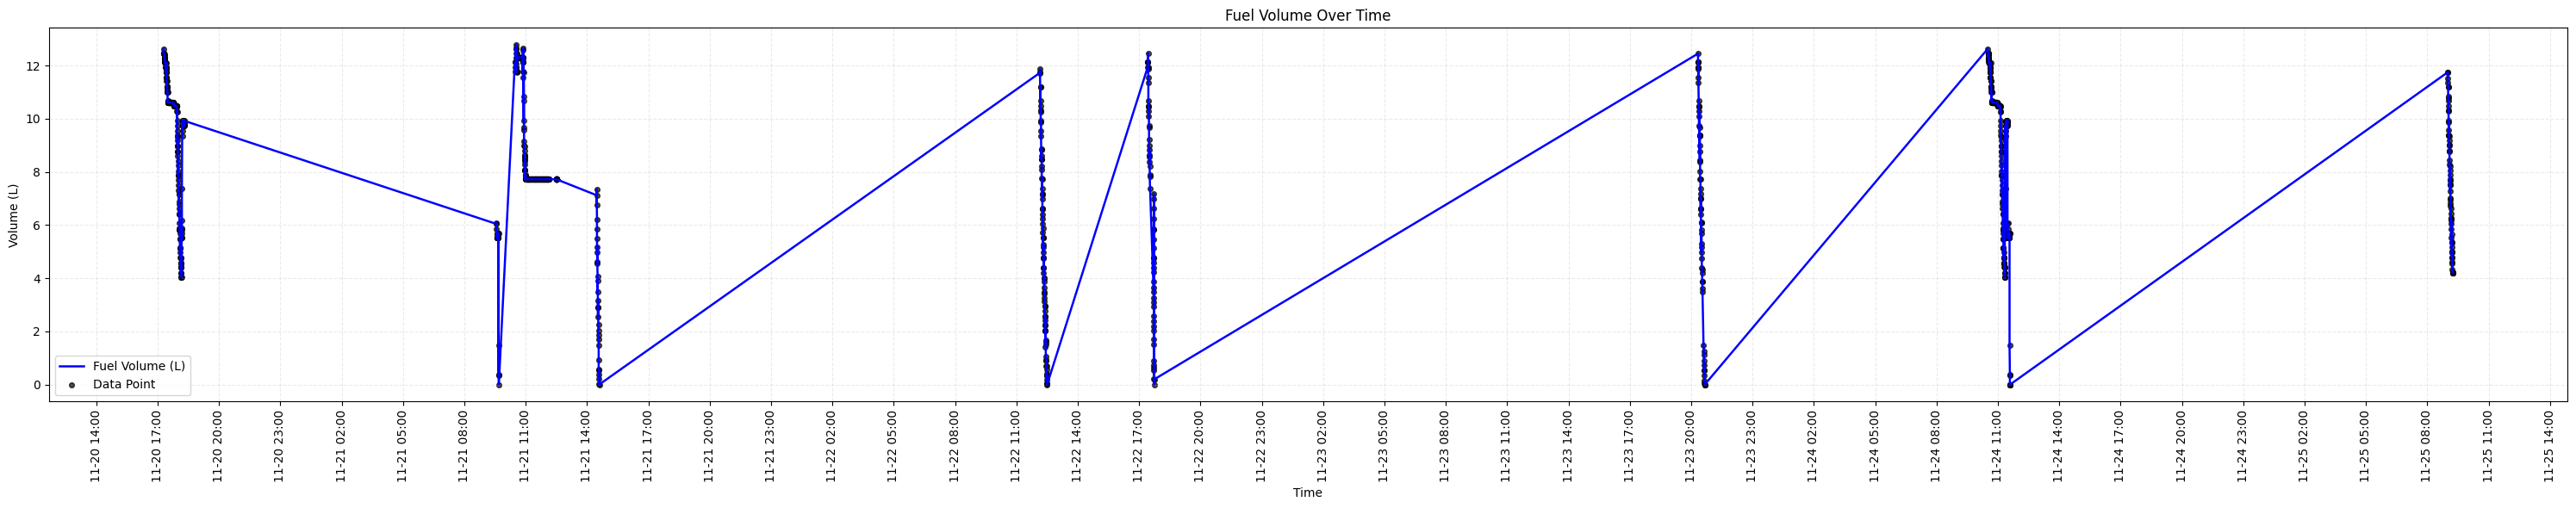

In [23]:
plt.figure(figsize=(30, 6))  # Wider for dense time axis

# Scatter and line for clarity
plt.plot(df['reading_time'], df['Fuel Volume (L)'], color='blue', label='Fuel Volume (L)', linewidth=1.8)
plt.scatter(df['reading_time'], df['Fuel Volume (L)'], color='black', s=17, label='Data Point', alpha=0.7)

plt.title('Fuel Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume (L)')
plt.legend()

# Major ticks every 3 hours, show hour+minute+date
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', alpha=0.25)
plt.tight_layout()

plt.show()

In [25]:
df['volume_diff'] = df['Fuel Volume (L)'].diff()

In [17]:
print(df)

      id  reading        reading_time  Fuel Volume (L)  volume_diff
0      1    23.02 2025-11-20 17:17:00            12.63          NaN
1      2    23.22 2025-11-20 17:17:00            12.46        -0.17
2      3    23.22 2025-11-20 17:18:00            12.46         0.00
3      4    23.22 2025-11-20 17:18:00            12.46         0.00
4      5    23.22 2025-11-20 17:18:00            12.46         0.00
..   ...      ...                 ...              ...          ...
894  895    37.16 2025-11-23 20:38:00             0.53        -0.02
895  896    37.37 2025-11-23 20:38:00             0.35        -0.18
896  897    37.59 2025-11-23 20:39:00             0.16        -0.19
897  898    37.73 2025-11-23 20:39:00             0.04        -0.12
898  899    37.78 2025-11-23 20:39:00             0.00        -0.04

[899 rows x 5 columns]


In [46]:
from sklearn.ensemble import IsolationForest

diff = df[['volume_diff']].dropna()
iso = IsolationForest(contamination=0.01, random_state=42)
labels = iso.fit_predict(diff)
df.loc[diff.index, 'iso_outlier'] = labels
iso_outliers = df[df['iso_outlier'] == -1]


In [37]:
df.loc[diff.index, 'iso_outlier'] = labels

In [39]:
iso_outliers = df[df['iso_outlier'] == -1]
print(iso_outliers[['reading_time', 'Fuel Volume (L)', 'volume_diff']])

           reading_time  Fuel Volume (L)  volume_diff
206 2025-11-20 18:11:00             7.37         1.54
207 2025-11-20 18:12:00             9.36         1.99
232 2025-11-21 09:34:00             6.04        -3.85
255 2025-11-21 09:40:00             1.48        -4.19
259 2025-11-21 10:28:00            12.13        12.13
703 2025-11-22 12:09:00            11.73        11.73
782 2025-11-22 17:25:00            12.12        12.12
841 2025-11-23 20:20:00            12.12        12.12
888 2025-11-23 20:36:00             1.46        -2.03


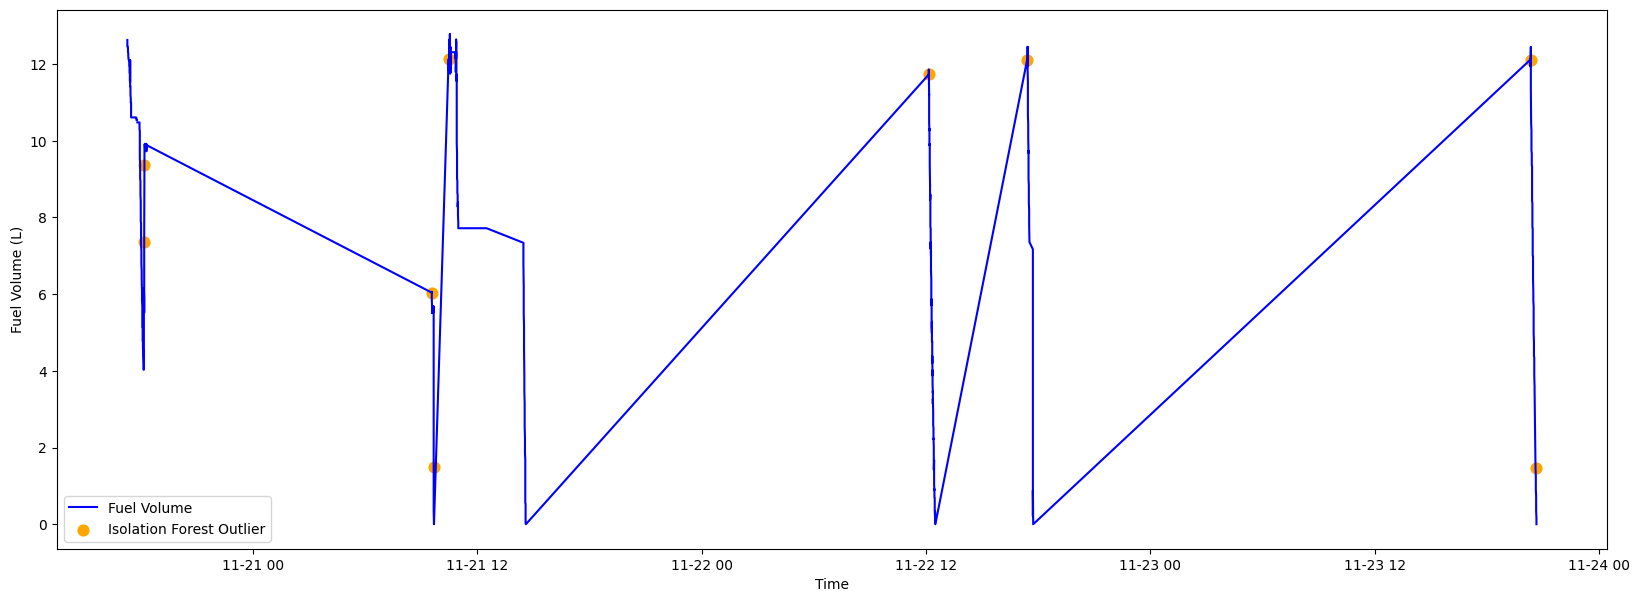

In [40]:
plt.figure(figsize=(20, 7))
plt.plot(df['reading_time'], df['Fuel Volume (L)'], label='Fuel Volume', color='blue')

# Remove this line if you don't have a statistical outliers DataFrame
# plt.scatter(outliers['reading_time'], outliers['Fuel Volume (L)'], color='red', s=80, label='Statistical Outlier')

plt.scatter(iso_outliers['reading_time'], iso_outliers['Fuel Volume (L)'],
            color='orange', s=60, label='Isolation Forest Outlier')
plt.xlabel('Time')
plt.ylabel('Fuel Volume (L)')
plt.legend()
plt.show()


In [41]:
df['rolling_mean'] = df['Fuel Volume (L)'].rolling(window=5).mean()
df['rolling_std'] = df['Fuel Volume (L)'].rolling(window=5).std()

In [42]:
df['hour'] = df['reading_time'].dt.hour
df['day_of_week'] = df['reading_time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'] >= 5

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['volume_diff_scaled'] = scaler.fit_transform(df[['volume_diff']].fillna(0))

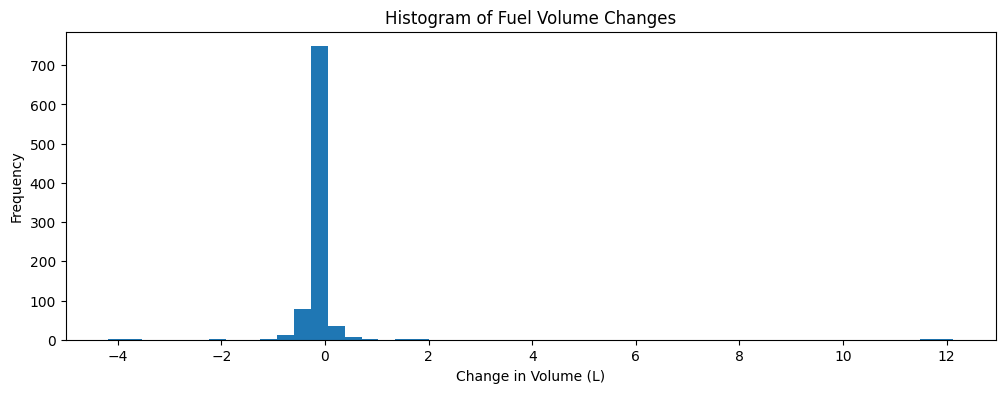

In [44]:
plt.figure(figsize=(12, 4))
plt.hist(df['volume_diff'].dropna(), bins=50)
plt.title('Histogram of Fuel Volume Changes')
plt.xlabel('Change in Volume (L)')
plt.ylabel('Frequency')
plt.show()

In [47]:
from sklearn.ensemble import IsolationForest

# Use only non-NaN volume_diff for training
features = df[['volume_diff', 'rolling_mean', 'rolling_std']].dropna()

iso_model = IsolationForest(contamination=0.01, random_state=42)
iso_model.fit(features)

# Predict anomalies: -1 = anomaly, 1 = normal
iso_labels = iso_model.predict(features)
df.loc[features.index, 'anomaly_flag'] = iso_labels

In [66]:
# Extract anomalies for reporting
anomalies = df[df['anomaly_flag'] == -1]
print("Detected anomalies:")
print(anomalies[['reading_time', 'Fuel Volume (L)', 'volume_diff', 'rolling_mean', 'rolling_std']])

Detected anomalies:
           reading_time  Fuel Volume (L)  volume_diff  rolling_mean  \
257 2025-11-21 09:40:00             0.35        -5.34         4.550   
254 2025-11-21 09:40:00             5.67         5.30         3.520   
255 2025-11-21 09:40:00             1.48        -4.19         2.712   
259 2025-11-21 10:28:00            12.13        12.13         3.930   
263 2025-11-21 10:30:00            12.13         0.34         9.600   
704 2025-11-22 12:09:00            11.71        11.71         2.530   
785 2025-11-22 17:25:00            11.94        11.94         2.500   
784 2025-11-22 17:25:00            12.13         0.19         4.888   
844 2025-11-23 20:20:00            11.94        11.75         3.600   

     rolling_std  
257     2.349245  
254     2.885429  
255     2.747730  
259     5.108537  
263     5.368436  
704     5.136852  
785     5.278736  
784     6.525877  
844     4.889330  


In [48]:
df['prev_fuel_volume'] = df['Fuel Volume (L)'].shift(1)

In [49]:
# A refill is legitimate if previous volume == 0 and the current volume is large
df['legit_refill'] = (df['prev_fuel_volume'] == 0) & (df['volume_diff'] > 2)  # Adjust threshold as needed

In [50]:
df['anomaly_flag_corrected'] = df['anomaly_flag']  # Copy initial model output
df.loc[df['legit_refill'], 'anomaly_flag_corrected'] = 1  # Set to "normal"

In [51]:
df.index = range(1, len(df) + 1)

In [52]:
feature_cols = ['volume_diff']  # You can add more columns here for deeper context
X = df[feature_cols].dropna()


In [53]:
df['rolling_mean'] = df['Fuel Volume (L)'].rolling(window=5).mean()
df['rolling_std'] = df['Fuel Volume (L)'].rolling(window=5).std()
feature_cols = ['volume_diff', 'rolling_mean', 'rolling_std']
X = df[feature_cols].dropna()


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [57]:
# 1) Create anomalies DataFrame (rows flagged as -1)
anomalies = df[df['anomaly_flag'] == -1]   # or 'iso_outlier' if that is your column

# 2) Now you can safely print selected columns
print(anomalies[['id', 'reading_time', 'Fuel Volume (L)', 'volume_diff', 'prev_fuel_volume']])


      id        reading_time  Fuel Volume (L)  volume_diff  prev_fuel_volume
233  233 2025-11-21 09:34:00             6.04        -3.85              9.89
256  256 2025-11-21 09:40:00             1.48        -4.19              5.67
260  260 2025-11-21 10:28:00            12.13        12.13              0.00
704  704 2025-11-22 12:09:00            11.73        11.73              0.00
706  706 2025-11-22 12:09:00            11.86         0.15             11.71
707  707 2025-11-22 12:10:00            11.19        -0.67             11.86
783  783 2025-11-22 17:25:00            12.12        12.12              0.00
784  784 2025-11-22 17:25:00            12.12         0.00             12.12
841  842 2025-11-23 20:20:00            12.12        12.12              0.00


In [56]:
df['true_anomaly'] = 0  # assume all records are normal at first


In [40]:
from sklearn.ensemble import IsolationForest

# 1) Train Isolation Forest on volume_diff
X = df[['volume_diff']].dropna()
iso = IsolationForest(contamination=0.01, random_state=42)
df.loc[X.index, 'iso_flag'] = iso.fit_predict(X)   # now iso_flag exists

# 2) Build mask where we have both true labels and predictions
mask = df['true_anomaly'].notnull() & df['iso_flag'].notnull()

# 3) Prepare y_true and y_pred
y_true = df.loc[mask, 'true_anomaly'].astype(int)
y_pred = (df.loc[mask, 'iso_flag'] == -1).astype(int)

# 4) Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1221
           1       0.00      0.00      0.00         0

    accuracy                           0.99      1221
   macro avg       0.50      0.49      0.50      1221
weighted avg       1.00      0.99      0.99      1221



c:\Users\SENURA UPESH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SENURA UPESH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SENURA UPESH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag